## CS345 Fall 2022 Assignment 2


### Preliminaries

We'll start with a review of the notation used to represent a dataset. In supervised learning we work with a dataset of $N$ labeled examples: $\mathcal{D} = \{ (\mathbf{x}_i, y_i) \}_{i=1}^N$, where $\mathbf{x}_i$ is a $d$-dimensional vector (we always use boldface to denote vectors), and $y_i$ is the label associated with $\mathbf{x}_i$.  For the perceptron algorithm we used the labels $\pm 1$, so make sure that is the case for the data you read in.

Datasets:

* The [Gisette](http://archive.ics.uci.edu/ml/datasets/Gisette) handwritten digit recognition dataset. For this dataset use the separately provided validation set for testing your classifiers.
* The [QSAR](http://archive.ics.uci.edu/ml/datasets/QSAR+biodegradation) data for predicting the biochemical activity of a molecule.
* The [heart disease diagnosis](http://archive.ics.uci.edu/ml/datasets/Heart+Disease) dataset.
* The [Wisconsin breast cancer wisconsin dataset](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer).
* For developing your code, you can use one of the scikit-learn datasets, such as the [make_classification](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html#sklearn.datasets.make_classification) toy dataset generator.
  

## Part 1:  Variation on the perceptron algorithm 

In this part of the assignment you will work with the perceptron and an additional variant we will call the **ensemble perceptron**.
It is created by averaging the votes of multiple perceptron models to create a prediction.
Ensemble learning is a common theme in machine learning, and later in the semester we will see algorithms specifically designed for this purpose.  In this assignment we will create a very simple implementation of this idea.
The idea leverages a phenomenon known as [the wisdom of the crowd](https://en.wikipedia.org/wiki/Wisdom_of_the_crowd), namely that a collection of predictions of diverse experts (or even non experts), can, when aggregated lead to incredibly accurate predictions.


**The idea:**  Rather than using a single classifier for making a prediction, use an average of the predictions made by multiple perceptrons trained on the same dataset.  This can lead to more robust and accurate predictions.

Here are the details of the training algorithm:

**Ensemble perceptron**

**Input:** number of perceptrons in the ensemble (`num_classifiers`).

**Output:**  a list of perceptron classifiers.

**Training:**
* Train `num_classifiers` perceptrons, each with a different initial weight vector (this is important!!!).  Each perceptron will be trained until convergence, or until a fixed number of epochs has passed (recall that an epoch is a loop over all the training data).

**prediction:**

* **decision_function:** Let $f_i(\mathbf{x})$ be the decision function of perceptron $i$.  Then the decision function of the ensemble is defined as 

$$
f(\mathbf{x}) = \frac{1}{\mathrm{num\_classifiers}} \sum_{i=1}^{\mathrm{num\_classifiers}} f_i(\mathbf{x})
$$

* **predict:**  The predict function will return $\mathrm{sign}(f(\mathbf{x}))$ where $f(\mathbf{x})$ is the value of the decision function defined above.



Here's what you need to do:

- Implement the ensemble perceptron as a Python class called `ensemble_perceptron` using the same interface used in the code provided for the perceptron algorithm, i.e. provides the same methods with the same signature.  In each case make sure that your implementation **includes a bias term as described in the perceptron notebook** where you will find guidance on how to add a bias term to an algorithm that is expressed without one.

- Compare the performance of the ensemble perceptron with the regular perceptron on the QSAR and breast cancer diagnosis datasets. Do so by estimating the accuracy on a sample of the data that you reserve for testing (the test set).  In each case reserve  70% of the data for training, and 30% for testing.  To gain more confidence in our error estimates, repeat this experiment using 10 random splits of the data into training/test sets for each algorithm.  It is best to use the same train-test splits for each algorithm.  Report the average accuracy and its standard deviation in a nicely formatted table.  Is there a version of the perceptron that appears to perform better?   (In answering this, consider the differences in performance you observe in comparison to the standard deviation).  Make sure to let the algorithm run for a sufficient number of epochs.

A note about the classifier API:  in this course we follow the scikit-learn classifier API, which requires that a classifier have the following methods (in addition to a constructor):

* `fit(X, y)`:  trains a classifier using a feature matrix `X` and a labels vector `y`.
* `predict(X)`:  given a feature matrix `X`, return a vector of labels for each feature vector represented by `X`.

For those interested in more information about the scikit-learn API, here's a [link](https://scikit-learn.org/stable/developers/develop.html).


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [ ]:
#regular perceptron 
class perceptron :
    """An implementation of the perceptron algorithm.
    Note that this implementation does not include a bias term"""
 
    def __init__(self, iterations=100, learning_rate=0.2, 
                 plot_data=False, random_w=True, seed=42) :
        self.iterations = iterations
        self.learning_rate = learning_rate
        self.plot_data = plot_data
        self.random_w = True
        self.seed = seed
  
    def fit(self, X, y) :
        """
        Train a classifier using the perceptron training algorithm.
        After training the attribute 'w' will contain the perceptron weight vector.
 
        Parameters
        ----------
 
        X : ndarray, shape (num_examples, n_features)
        Training data.
 
        y : ndarray, shape (n_examples,)
        Array of labels.
 
        """
        
        if self.random_w :
            rng = np.random.default_rng(self.seed)
            self.w = rng.uniform(-1 , 1, len(X[0]))
            # print("initialized with random weight vector")
        else :
            self.w = np.zeros(len(X[0]))
            print("initialized with a zeros weight vector")
        self.wold = self.w
        converged = False
        iteration = 0
        while (not converged and iteration <= self.iterations) :
            converged = True
            for i in range(len(X)) :
                if y[i] * self.decision_function(X[i]) <= 0 :
                    self.wold = self.w
                    self.w = self.w + y[i] * self.learning_rate * X[i]
                    converged = False
                    if self.plot_data:
                        self.plot_update(X, y, i)
            iteration += 1
        self.converged = converged
        if converged :
            print ('converged in %d iterations ' % iteration)
 
    def decision_function(self, x) :
        return np.dot(x, self.w)
 
    def predict(self, X) :
        """
        make predictions using a trained linear classifier
 
        Parameters
        ----------
 
        X : ndarray, shape (num_examples, n_features)
        Training data.
        """
 
        scores = np.dot(X, self.w)
        return np.sign(scores)
    
    def plot_update(self, X, y, ipt) :
        fig = plt.figure(figsize=(4,4))
        plt.xlim(-1,1)
        plt.ylim(-1,1)
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        plt.arrow(0,0,self.w[0],self.w[1], 
                  width=0.001,head_width=0.05, 
                  length_includes_head=True, alpha=1,
                  linestyle='-',color='darkred')
        plt.arrow(0,0,self.wold[0],self.wold[1], 
                  width=0.001,head_width=0.05, 
                  length_includes_head=True, alpha=1,
                  linestyle='-',color='orange')
        anew = -self.w[0]/self.w[1]
        aold = -self.wold[0]/self.wold[1]
        pts = np.linspace(-1,1)
        plt.plot(pts, anew*pts, color='darkred')
        plt.plot(pts, aold*pts, color='orange')
        plt.title("in orange:  old w; in red:  new w")
        cols = {1: 'g', -1: 'b'}
        for i in range(len(X)): 
            plt.plot(X[i][0], X[i][1], cols[y[i]]+'o', alpha=0.6,markersize=5) 
        plt.plot(X[ipt][0], X[ipt][1], 'ro', alpha=0.2,markersize=20)

In [ ]:
class ensemble_perceptron :
    def __init__(self, num_classifiers=50,
                 iterations=100, 
                 learning_rate=0.2) :
                 
        self.num_classifiers = num_classifiers
        self.iterations = iterations
        self.learning_rate = learning_rate
        self.plot_data = False
        self.random_w = True
        self.seed = 42
        self.random_w = True

    def fit(self,X,y):

        if self.random_w :
            rng = np.random.default_rng(self.seed)
            self.w = rng.uniform(-1 , 1, (self.num_classifiers,len(X[0])+1))
            # print("initialized with random weight vector")
        else :
            self.w = np.zeros(len(X[0]))
            print("initialized with a zeros weight vector")
        self.wold = self.w
        converged = False
        iteration = 0
    # Each with a different initial weight vector (this is important!!!).
      #  if self.random_w :
      #    rng = np.random.default_rng(self.seed)
       
      #   self.w = rng.uniform(-1,1,(self.num_classifiers,len(X[0]+1)))
      #   print("Initial with different weight vector")
      #   self.word = self.w 
      #   converged = False
      #   iteration = 0
        while (not converged and iteration <= self.iterations):
          converged = True 
          for i in range(len(X)) :
                if y[i] * self.decision_function_ensemble(X[i]) <= 0 :
                    self.wold = self.w
                    for j in range(self.num_classifiers):
                        self.w[j][1:] = self.w[j][1:] + y[i] * self.learning_rate * X[i]
                    # baise
                        self.w[j][0] = self.w[j][0] + y[i] * self.learning_rate 
                        converged = False
                    if self.plot_data:
                        self.plot_update(X, y, i)
          iteration += 1
        self.converged = converged
        if converged :
            print ('converged in %d iterations ' % iteration)

    def decision_function_single(self,id, x):
        return np.dot(x,self.w[id][1:]) + self.w[id][0]

    def decision_function_ensemble(self, x):
        result = []
        for i in range (self.num_classifiers):
          result.append(self.decision_function_single(i,x))
        result = np.array(result)
        mean = np.mean(result)

        return mean

    
    def predict(self,X):
        final_score = []
        for i in range(len(X)):
          score = []
          for j in range (self.num_classifiers):
            score.append(np.dot(X[i],self.w[j][1:])+self.w[j][0])
          scores = np.mean(score)
          final_score.append(scores)

        # scores = np.dot(X, self.w[1:]) +self.w[0]
        return np.sign(final_score)
    
    def plot_update(self, X, y, ipt) :
        fig = plt.figure(figsize=(4,4))
        plt.xlim(-1,1)
        plt.ylim(-1,1)
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        plt.arrow(0,0,self.w[0],self.w[1], 
                  width=0.001,head_width=0.05, 
                  length_includes_head=True, alpha=1,
                  linestyle='-',color='darkred')
        plt.arrow(0,0,self.wold[0],self.wold[1], 
                  width=0.001,head_width=0.05, 
                  length_includes_head=True, alpha=1,
                  linestyle='-',color='orange')
        anew = -self.w[0]/self.w[1]
        aold = -self.wold[0]/self.wold[1]
        pts = np.linspace(-1,1)
        plt.plot(pts, anew*pts, color='darkred')
        plt.plot(pts, aold*pts, color='orange')
        plt.title("in orange:  old w; in red:  new w")
        cols = {1: 'g', -1: 'b'}
        for i in range(len(X)): 
            plt.plot(X[i][0], X[i][1], cols[y[i]]+'o', alpha=0.6,markersize=5) 
        plt.plot(X[ipt][0], X[ipt][1], 'ro', alpha=0.2,markersize=20)
      
    

In [ ]:
# import QSAR dataset
QSAR_data = pd.read_csv('biodeg.csv',sep =";", header = None)
X_QSAR = QSAR_data.values[:,:-1]
y1 = QSAR_data.values[:,-1]
unique_label = np.unique(QSAR_data.values[:,-1])
y_QSAR = np.array([np.where(i== unique_label)[0][0]for i in y1])
print ("------------", y_QSAR)
y_QSAR = y_QSAR*2 -1
print (X_QSAR.shape, y_QSAR.shape)
print (y_QSAR)


# import breast cancer dataset
from sklearn.datasets import load_breast_cancer
breast_data = load_breast_cancer()
X_breast = breast_data.data
y_breast = breast_data.target
y_breast = y_breast * 2 - 1
print (X_breast.shape, y_breast.shape)







------------ [1 1 1 ... 0 0 0]
(1055, 41) (1055,)
[ 1  1  1 ... -1 -1 -1]
(569, 30) (569,)


In [ ]:
#compare ensemble perceptron with the regular perceptron on the QSAR and breast cancer diagnosis datasets
from sklearn.model_selection import train_test_split
accuracy_test_breast1= []
accuracy_test_QSAR1= []

for l in range(10):
  X_train_breast, X_test_breast, y_train_breast, y_test_breast = train_test_split(
    X_breast, y_breast, test_size=0.3, random_state=l)
  X_train_QSAR, X_test_QSAR, y_train_QSAR, y_test_QSAR = train_test_split(
    X_QSAR, y_QSAR, test_size=0.3, random_state=l)
  p1 = ensemble_perceptron (num_classifiers=50,iterations=10, learning_rate=0.2)
  p1.fit(X_train_breast,y_train_breast)
  y_pred_test_breast = p1.predict(X_test_breast)
  p2 = ensemble_perceptron (num_classifiers=50,iterations=10, learning_rate=0.2)
  
  p2.fit(X_QSAR,y_QSAR)
  y_pred_test_QSAR = p2.predict(X_test_QSAR)
  accuracy_test_breast1.append(np.mean(y_test_breast == y_pred_test_breast))
  accuracy_test_QSAR1.append(np.mean(y_test_QSAR == y_pred_test_QSAR))



print('accuracy for breast(test): ', accuracy_test_breast1)
print('accuracy for QSAR(test): ', accuracy_test_QSAR1)

mean_breast1 = np.mean(accuracy_test_breast1)
st_d_breast1 = np.std(accuracy_test_breast1)
mean_QSAR1 = np.mean(accuracy_test_QSAR1)
st_d_QSAR1 = np.std(accuracy_test_QSAR1)
print("ensemble perceptron---------------------------------------------------")
print("mean_breast", mean_breast1, " standardar deviation", st_d_breast1)
print("mean_QSAR", mean_QSAR1, " standardar deviation", st_d_QSAR1)

accuracy for breast(test):  [0.5789473684210527, 0.9239766081871345, 0.8713450292397661, 0.9181286549707602, 0.7777777777777778, 0.9415204678362573, 0.8245614035087719, 0.8947368421052632, 0.40350877192982454, 0.5906432748538012]
accuracy for QSAR(test):  [0.7066246056782335, 0.6498422712933754, 0.6782334384858044, 0.6214511041009464, 0.668769716088328, 0.694006309148265, 0.668769716088328, 0.6782334384858044, 0.6561514195583596, 0.6656151419558359]
ensemble perceptron---------------------------------------------------
mean_breast 0.7725146198830409  standardar deviation 0.17517426480458623
mean_QSAR 0.6687697160883281  standardar deviation 0.022395254699430732


In [ ]:
X_breast = np.hstack([X_breast, np.ones((len(X_breast), 1))])
X_QSAR = np.hstack([X_QSAR, np.ones((len(X_QSAR), 1))])
accuracy_test_breast2= []
accuracy_test_QSAR2= []
for l in range(10):
  X_train_breast, X_test_breast, y_train_breast, y_test_breast = train_test_split(
    X_breast, y_breast, test_size=0.3, random_state=l)
  X_train_QSAR, X_test_QSAR, y_train_QSAR, y_test_QSAR = train_test_split(
    X_QSAR, y_QSAR, test_size=0.3, random_state=l)
  p3 = perceptron (iterations=10, learning_rate=0.2, 
                 plot_data=False, random_w=True, seed=42)
  p3.fit(X_train_breast,y_train_breast)

  y_pred_test_breast = p3.predict(X_test_breast)

  p4 = perceptron (iterations=10, learning_rate=0.2, 
                 plot_data=False, random_w=True, seed=42)
  
  p4.fit(X_QSAR,y_QSAR)
  y_pred_test_QSAR = p4.predict(X_test_QSAR)
  accuracy_test_breast2.append(np.mean(y_test_breast == y_pred_test_breast))
  accuracy_test_QSAR2.append(np.mean(y_test_QSAR == y_pred_test_QSAR))



print('accuracy for breast(test): ', accuracy_test_breast2)
print('accuracy for QSAR(test): ', accuracy_test_QSAR2)

mean_breast2 = np.mean(accuracy_test_breast2)
st_d_breast2 = np.std(accuracy_test_breast2)
mean_QSAR2 = np.mean(accuracy_test_QSAR2)
st_d_QSAR2 = np.std(accuracy_test_QSAR2)
print("regular perceptron-------------------------------------------------")
print("mean_breast", mean_breast2, " standardar deviation", st_d_breast2)
print("mean_QSAR", mean_QSAR2, " standardar deviation", st_d_QSAR2)



accuracy for breast(test):  [0.9298245614035088, 0.8830409356725146, 0.9064327485380117, 0.9122807017543859, 0.8128654970760234, 0.935672514619883, 0.8011695906432749, 0.8888888888888888, 0.7192982456140351, 0.5730994152046783]
accuracy for QSAR(test):  [0.7066246056782335, 0.6498422712933754, 0.6782334384858044, 0.6214511041009464, 0.668769716088328, 0.694006309148265, 0.668769716088328, 0.6782334384858044, 0.6561514195583596, 0.6656151419558359]
regular perceptron-------------------------------------------------
mean_breast 0.8362573099415205  standardar deviation 0.10909215266770543
mean_QSAR 0.6687697160883281  standardar deviation 0.022395254699430732


In [ ]:
data1 = [[0.7847953216374268,0.835672514619883], [0.1778354784785575,0.10872947671821871]]
print ('Breast cancer')
df1 = pd.DataFrame(data1,columns =["ensemble_perceptron","perceptron"],index = ['Mean', 'Standard deviation'])
display(df1)
print()
data2 = [[0.6694006309148266,0.6687697160883281], [0.022386365929602747,0.022395254699430732]]
print ('QSAR')
df2 = pd.DataFrame(data2,columns =["ensemble_perceptron","perceptron"],index = ['Mean', 'Standard deviation'])
display(df2)

Breast cancer


,ensemble_perceptron,perceptron
Mean,0.784795,0.835673
Standard deviation,0.177835,0.108729



QSAR


,ensemble_perceptron,perceptron
Mean,0.669401,0.668770
Standard deviation,0.022386,0.022395


## Part 2:  Learning Curves 

Whenever we train a classifier it is useful to know if we have collected a sufficient amount of data for accurate classification.  A good way of determining that is to construct a **learning curve**, which is a plot of classifier performance as a function of the number of training examples.  Plot a learning curve for the perceptron algorithm using the Gisette dataset.  You can use the Gisette validation set for testing purposes.  The x-axis for the plot (number of training examples) should be on a logarithmic scale - something like 10,20,40,80,200,400,800.  Use numbers that are appropriate for the dataset at hand, choosing values that illustrate the variation that you observe.  What can you conclude from the learning curve you have constructed for this particular dataset?
In answering this question, you can use the following [wikipedia article](https://en.wikipedia.org/wiki/Learning_curve#In_machine_learning).
Make sure that you use a fixed test set to evaluate performance while varying the size of the training set.


In [ ]:
###########train_data###################
train_data = []
file1 = open('gisette_train.data','r')
for line in file1.readlines():
  train_data.append((line.strip()).split(' '))

train_data = np.array(train_data, dtype = np.float32)
print(train_data.shape)

###########train_labels###################
train_labels = []
file2 = open('gisette_train.labels','r')
for line in file2.readlines():
  train_labels.append((line.strip()).split(' '))
train_labels = np.array(train_labels, dtype = np.float32).flatten()
print(train_labels.shape)

###########valid.data###################
valid_data = []
file3 = open('gisette_valid.data','r')
for line in file3.readlines():
  valid_data.append((line.strip()).split(' '))

valid_data = np.array(valid_data, dtype = np.float32)
print(valid_data.shape)

###########valid_labels###################
valid_labels = []
file4 = open('gisette_valid.labels','r')
for line in file4.readlines():
  valid_labels.append((line.strip()).split(' '))
valid_labels = np.array(valid_labels, dtype = np.float32).flatten()
print(valid_labels.shape)


(6000, 5000)
(6000,)
(1000, 5000)
(1000,)


In [ ]:
training_example = [10,20,40,80,200,400,800,1600]
accuracy1 = []
accuracy2 = []
for n in training_example:
  p = perceptron()
  p.fit(train_data[:n,], train_labels[:n])
  p2.fit(valid_data[:n,], valid_labels[:n])
  y_pred1 = p.predict(valid_data[:n,])
  y_pred2 = p2.predict(train_data[:n,])
  accuracy1.append(np.mean(valid_labels[:n] == y_pred1[:n]))
  accuracy2.append(np.mean(train_labels[:n] == y_pred2[:n]))
print(accuracy1)


converged in 3 iterations 
converged in 3 iterations 
converged in 5 iterations 
converged in 5 iterations 
converged in 5 iterations 
converged in 5 iterations 
converged in 6 iterations 
converged in 4 iterations 
converged in 7 iterations 
converged in 5 iterations 
converged in 7 iterations 
converged in 6 iterations 
converged in 9 iterations 
converged in 9 iterations 
converged in 12 iterations 
converged in 8 iterations 
[0.5, 0.8, 0.825, 0.8375, 0.91, 0.905, 0.95125, 0.963]


In [ ]:
print(accuracy1, accuracy2)

[0.5, 0.8, 0.825, 0.8375, 0.91, 0.905, 0.95125, 0.963] [0.4, 0.65, 0.7, 0.8375, 0.905, 0.92, 0.93625, 0.94875]


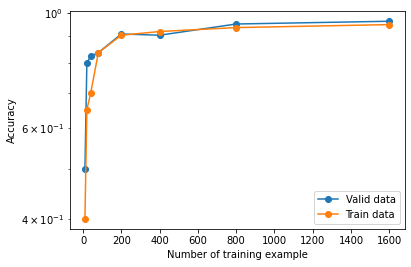

In [ ]:
plt.semilogy(training_example,accuracy1, label = "Valid data",marker = 'o')
plt.semilogy(training_example,accuracy2, label = "Train data", marker = 'o')
plt.xlabel("Number of training example")
plt.ylabel("Accuracy")
plt.legend();


Based on the graph, I can noticed that the error of train data and valid data  are very small.

## Part 3:  Data standardization 

In this section we will explore the effect of normalizing the data, focusing on normalization of each feature individually.  In class we saw how to convert each column (i.e. feature) of a data matrix so that it fall in the range $[-1,1]$.  In this assignment we will explore a different approach callled **standardization**.

Here's what you need to do:

* Write a method to standardize a data matrix, so that each column has zero mean and standard deviation equal to 1.  This is done by subtracting the mean of each column, and dividing by its standard deviation.  See details [here](https://en.wikipedia.org/wiki/Feature_scaling#Standardization_(Z-score_Normalization)).  
Do not use the scikit-learn implementation.

* Compare the accuracy of the standard perceptron on the heart dataset  with standardization and without it.  Which leads to better performance?  Can you explain why?


In this exercise we're using the
[Heart disease diagnosis dataset](http://archive.ics.uci.edu/ml/datasets/Heart+Disease).
This dataset has several data files associated with it.  The easiest would be to use [this file](http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data), where categorical variables have been replaced with numerical vaues.  The last column in the file contains the label associated with each example.  In the processed file, a label `0` corresponds to a healthy individual; other values correspond to varying levels of heart disease.  **In your experiments focus on the binary classification problem of trying to distinguish between healthy and non-healthy individuals.**

In [ ]:
heart_disease = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data', header = None)
X_heart = heart_disease.values[:,:-1]
y_heart = heart_disease.values[:,-1]
# print(X_heart.shape,y_heart.shape)
# print(y_heart)
# 1 is health individual, -1 is non-health individual
X_heart[X_heart == '?']=0
y_heart[y_heart>0] = -1
y_heart[y_heart==0]=1
y_heart[y_heart== '?']=0
X_heart = np.array(X_heart,dtype=np.float32)
y_heart = np.array(y_heart,dtype=np.float32)

# print(X_heart.shape, y_heart.shape)
print(X_heart)


[[63.  1.  1. ...  3.  0.  6.]
 [67.  1.  4. ...  2.  3.  3.]
 [67.  1.  4. ...  2.  2.  7.]
 ...
 [57.  1.  4. ...  2.  1.  7.]
 [57.  0.  2. ...  2.  1.  3.]
 [38.  1.  3. ...  1.  0.  3.]]


In [ ]:
# x' = (x - x(avg))/standard deviation
from sklearn import preprocessing

def standardization(x):
  return (x - np.mean(x, axis=0)) / np.std(x, axis=0)

X_heart_std =standardization(X_heart)
#y_heart_std =standardization(y_heart)



In [ ]:
p = perceptron(iterations = 10, learning_rate = 0.1)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_heart, y_heart, test_size=0.3, random_state=5)
p.fit(X_train1,y_train1)
y_pred_test1 = p.predict(X_test1)
y_pred_train1 = p.predict(X_train1) 
accuracy_test_heart1 = np.mean(y_test1 == y_pred_test1) 
accuracy_train_heart1 = np.mean(y_train1 == y_pred_train1)
print("accuarcy of data without standardization",accuracy_test_heart1, accuracy_train_heart1)

p = perceptron(iterations = 10, learning_rate = 0.1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_heart_std, y_heart, test_size=0.3, random_state=5)
p.fit(X_train2,y_train2)
y_pred_test2 = p.predict(X_test2)
y_pred_train2 = p.predict(X_train2) 
accuracy_test_heart2 = np.mean(y_test2 == y_pred_test2) 
accuracy_train_heart2 = np.mean(y_train2== y_pred_train2)

print("accuracy of data with standardization",accuracy_test_heart2, accuracy_train_heart2)



accuarcy of data without standardization 0.4175824175824176 0.47641509433962265
accuracy of data with standardization 0.7362637362637363 0.7216981132075472


*discussion and explanation*
Which leads to better performance? Can you explain why?

the data with standardization leads to better ferformace. the way of feature scaling is to normalize the features of data which make it easily to compare the result. meanwhile, the data is standardized, the program's runtime will be faster comparing with data without standarization.

### Your Report

Answer the questions in the cells reserved for that purpose.


### Submission

Submit your report as a Jupyter notebook via Canvas.  Running the notebook should generate all the plots in your notebook.

### Grading 

Although we will not grade on a 100 pt scale, the following is a grading sheet that will help you:

```
Grading sheet for assignment 2

Part 1:  60 points.
Part 2:  20 points.
Part 3:  20 points.
```

Grading will be based on the following criteria:

  * Code correctness.
  * Plots and other results are well formatted and easy to understand.
  * Interesting and meaningful observations made where requested.
  * Notebook is readable, well-organized, and concise.